# L'objectif est de calculer, pour chaque zone de résidence "strate", les dépenses moyennes en carburants. L'analyse peut être affinée afin de comparer les dépenses en diesel et en essence. On constate que pour les deux carburants les ménages ruraux consomment davantage que les urbains.



# Import de modules généraux

In [1]:


import pandas
import seaborn


# Import de modules propres à OpenFisca

In [2]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario


# Import d'une nouvelle palette de couleurs

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline


# Simulation de la part des dépenses en carburants dans la consommation totale, par type d'aire de résidence

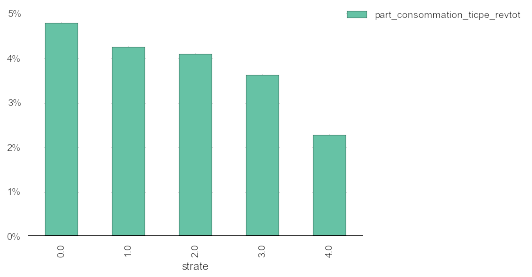

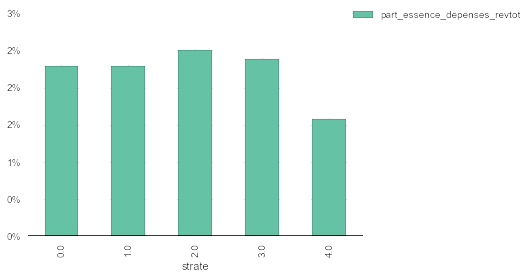

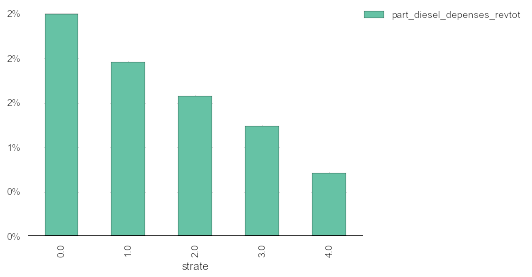

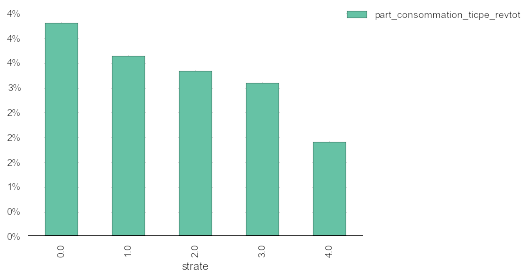

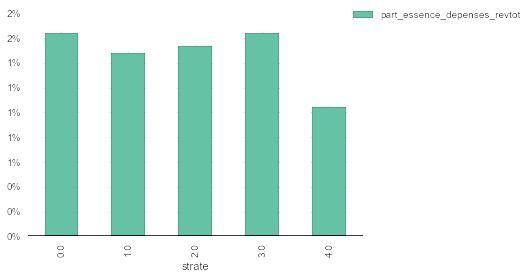

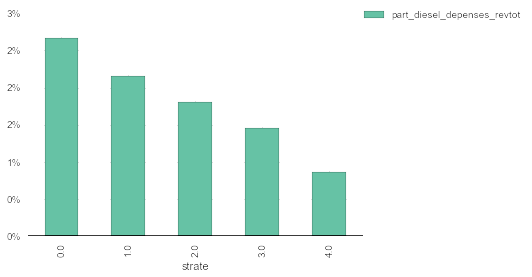

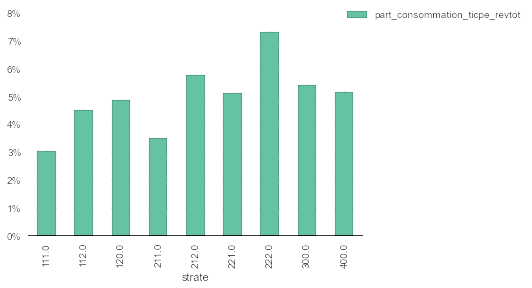

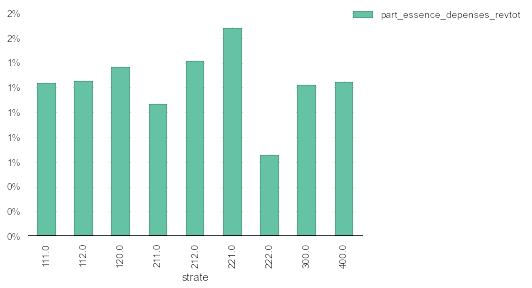

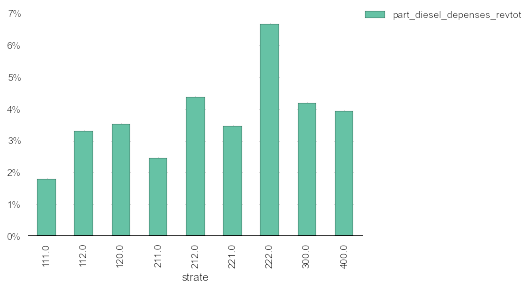

In [4]:
# Sélection des variables utilisées pour la simulation
simulated_variables = ['depenses_carburants', 'depenses_essence', 'depenses_diesel', 'revtot']
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['strate'])
            ])
    df = pivot_table.T

    # Réalisation de graphiques
    for element in simulated_variables:
        if element == 'revtot':
            continue
        df['part_{}_revtot'.format(element)] = \
            df['{}'.format(element)] / df['revtot']
        graph_builder_bar(df[['part_{}_revtot'.format(element)]])

